<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [5]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
population.describe(include = 'all')

,Zone,Année,Valeur
count,1416,1416.000000,1.416000e+03
unique,236,NaN,NaN
top,Afghanistan,NaN,NaN
freq,6,NaN,NaN
mean,NaN,2015.500000,3.144793e+04
std,NaN,1.708428,1.300812e+05
min,NaN,2013.000000,7.930000e-01
25%,NaN,2014.000000,3.783410e+02
50%,NaN,2015.500000,5.126480e+03
75%,NaN,2017.000000,1.930666e+04


In [7]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur']*1000

In [8]:
#changement du nom de la colonne Valeur par Population
population.rename(columns = {'Valeur' : 'Population'}, inplace = True)

In [9]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [10]:
population_2017 = population.loc[population['Année'] == 2017, :].copy().reset_index()
population_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       236 non-null    int64  
 1   Zone        236 non-null    object 
 2   Année       236 non-null    int64  
 3   Population  236 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.5+ KB


In [11]:
del population_2017['index']
population_2017.head()

,Zone,Année,Population
0,Afghanistan,2017,36296113.0
1,Afrique du Sud,2017,57009756.0
2,Albanie,2017,2884169.0
3,Algérie,2017,41389189.0
4,Allemagne,2017,82658409.0


In [12]:
pop = population_2017['Population'].sum()
print(pop)

7548134111.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [13]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [14]:
#Consulter le nombre de colonnes
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [15]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [16]:
dispo_alimentaire.describe(include='all')

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
unique,174,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Inde,Abats Comestible,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,NaN,NaN,NaN,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,NaN,NaN,NaN,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,NaN,NaN,NaN,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000


In [17]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire1 = dispo_alimentaire.fillna(0).copy()

In [18]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
liste_col = ['Aliments pour animaux', 'Autres Utilisations', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement']
for i in liste_col :
    dispo_alimentaire1[i] = dispo_alimentaire1[i]*1000000

In [19]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire1.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [20]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [21]:
#Consulter le nombre de colonnes
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [22]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [23]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns = {'Pays bénéficiaire' : 'Zone'}, inplace = True)

In [24]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur']*1000 

In [25]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [26]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [27]:
#Consulter le nombre de colonnes
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [28]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [29]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

ValueError: Unable to parse string "<0.1" at position 60

In [30]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition = sous_nutrition.fillna(0)

In [31]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur' : 'sous_nutrition'}, inplace=True)

In [32]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition']*1000000

In [33]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [34]:
sous_nutrition['Année'].unique()

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [35]:
sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018', :].reset_index()

In [36]:
sous_nutrition_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           203 non-null    int64  
 1   Zone            203 non-null    object 
 2   Année           203 non-null    object 
 3   sous_nutrition  203 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.5+ KB


In [37]:
sous_nutrition_2017.head()

,index,Zone,Année,sous_nutrition
0,4,Afghanistan,2016-2018,10500000.0
1,10,Afrique du Sud,2016-2018,3100000.0
2,16,Albanie,2016-2018,100000.0
3,22,Algérie,2016-2018,1300000.0
4,28,Allemagne,2016-2018,0.0


In [38]:
sous_nutrition_2017 = sous_nutrition_2017.replace('2016-2018', '2017').copy()

In [39]:
del sous_nutrition_2017['index'] 
sous_nutrition_2017.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2017,10500000.0
1,Afrique du Sud,2017,3100000.0
2,Albanie,2017,100000.0
3,Algérie,2017,1300000.0
4,Allemagne,2017,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [40]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
proportion_sous_nutrition = pd.merge(population_2017, sous_nutrition_2017[['Zone', 'sous_nutrition']], on='Zone', how='inner')

In [41]:
#Affichage du dataset
proportion_sous_nutrition.head()

,Zone,Année,Population,sous_nutrition
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0


In [42]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
nb_personnes_sous_nutrition = proportion_sous_nutrition['sous_nutrition'].sum()
print("Le nombre des personnes en état de sous-nutrition est de : {} personnes. ".format(round(nb_personnes_sous_nutrition)))

Le nombre des personnes en état de sous-nutrition est de : 535700000 personnes. 


In [43]:
#proportion a calculer = valeur
proportion_personne_sous_nutrition = nb_personnes_sous_nutrition*100/proportion_sous_nutrition['Population'].sum()
population = proportion_sous_nutrition['Population'].sum()
print("La proportion des personnes en état de sous-nutrition est de {}% de la population globale.".format(round(proportion_personne_sous_nutrition)))

La proportion des personnes en état de sous-nutrition est de 7% de la population globale.


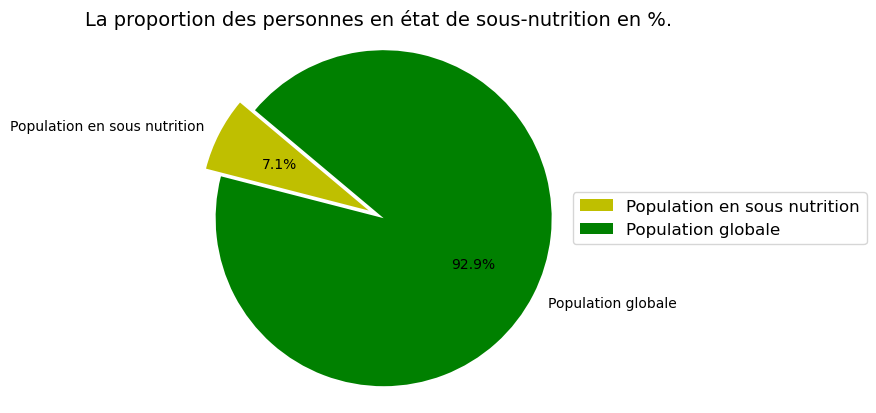

In [130]:
# Data to plot
labels = ['Population en sous nutrition', 'Population globale']
sizes = [proportion_personne_sous_nutrition, 100-proportion_personne_sous_nutrition]
colors = ['y', 'g']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title("La proportion des personnes en état de sous-nutrition en %.".format(round(proportion_personne_sous_nutrition,2)), fontsize=14)
plt.legend(loc='center right', fontsize=12, bbox_to_anchor=(1.5,0.5))
plt.show()

In [45]:
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [46]:
sous_nutrition_evol = sous_nutrition.groupby('Année').sum().reset_index()
sous_nutrition_evol.head()

,Année,Zone,sous_nutrition
0,2012-2014,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,528100000.0
1,2013-2015,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,523500000.0
2,2014-2016,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,524700000.0
3,2015-2017,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,528600000.0
4,2016-2018,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,535700000.0


In [47]:
sous_nutrition_evol['An'] =['2013', '2014', '2015', '2016', '2017', '2018']
sous_nutrition_evol.head()

,Année,Zone,sous_nutrition,An
0,2012-2014,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,528100000.0,2013
1,2013-2015,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,523500000.0,2014
2,2014-2016,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,524700000.0,2015
3,2015-2017,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,528600000.0,2016
4,2016-2018,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,535700000.0,2017


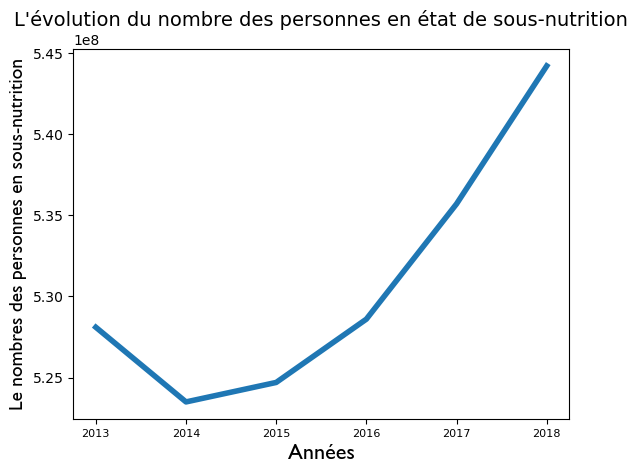

In [48]:
plt.plot(sous_nutrition_evol['An'], sous_nutrition_evol['sous_nutrition'], linewidth=4)
plt.xlabel("Années", fontname='Gill Sans MT', fontsize=16)
plt.ylabel("Le nombres des personnes en sous-nutrition", fontname='Gill Sans MT', fontsize=14)
plt.xticks(fontsize=8)
plt.title("L'évolution du nombre des personnes en état de sous-nutrition", fontsize=14)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [49]:
#Combien mange en moyenne un être humain ? Source => https://www.cerin.org/articles/references-nutritionnelles-pour-les-adultes/
#un homme dépense par jour 2600 kcal et une femme 2100 kcal je vais donc prendre une moyenne de 2350 kcal/jour comme besoin journalier
besoin_journalier = 2350

In [50]:
dispo_alimentaire_group = dispo_alimentaire1.groupby('Zone').sum().reset_index()
dispo_alimentaire_group.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,"Abats ComestibleAgrumes, AutresAliments pour e...",animalevegetalevegetalevegetalevegetaleanimale...,7.680000e+08,4.150000e+08,2087.0,351.41,33.50,58.26,1.351500e+10,2.780000e+08,2.988000e+09,1.073500e+10,1.135000e+09,1.117100e+10,3.950000e+08,6.300000e+07,-368.0
1,Afrique du Sud,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,5.309000e+09,8.760000e+08,3020.0,564.80,83.58,85.33,6.125600e+10,1.167400e+10,7.517000e+09,2.981200e+10,2.193000e+09,6.326300e+10,2.530000e+08,2.281900e+10,2153.0
2,Albanie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,6.600000e+08,1.740000e+08,3188.0,1095.54,106.48,111.37,4.758000e+09,9.400000e+07,9.330000e+08,3.476000e+09,2.760000e+08,3.964000e+09,5.500000e+07,1.130000e+08,-45.0
3,Algérie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,4.352000e+09,1.707000e+09,3293.0,809.13,76.48,91.92,4.263000e+10,6.550000e+08,1.740300e+10,3.172900e+10,3.753000e+09,2.635900e+10,4.490000e+08,6.370000e+08,-479.0
4,Allemagne,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,3.020900e+10,7.711000e+09,3503.0,957.52,141.62,101.39,1.622750e+11,5.743100e+10,6.535300e+10,7.923800e+10,3.781000e+09,1.545470e+11,1.551000e+09,3.984200e+10,-192.0


In [51]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
dispo_alimentaire_population = pd.merge(dispo_alimentaire_group, population_2017[['Zone', 'Population']], on = 'Zone', how = 'left')

In [52]:
#Affichage du nouveau dataframe
dispo_alimentaire_population.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population
0,Afghanistan,"Abats ComestibleAgrumes, AutresAliments pour e...",animalevegetalevegetalevegetalevegetaleanimale...,7.680000e+08,4.150000e+08,2087.0,351.41,33.50,58.26,1.351500e+10,2.780000e+08,2.988000e+09,1.073500e+10,1.135000e+09,1.117100e+10,3.950000e+08,6.300000e+07,-368.0,36296113.0
1,Afrique du Sud,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,5.309000e+09,8.760000e+08,3020.0,564.80,83.58,85.33,6.125600e+10,1.167400e+10,7.517000e+09,2.981200e+10,2.193000e+09,6.326300e+10,2.530000e+08,2.281900e+10,2153.0,57009756.0
2,Albanie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,6.600000e+08,1.740000e+08,3188.0,1095.54,106.48,111.37,4.758000e+09,9.400000e+07,9.330000e+08,3.476000e+09,2.760000e+08,3.964000e+09,5.500000e+07,1.130000e+08,-45.0,2884169.0
3,Algérie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,4.352000e+09,1.707000e+09,3293.0,809.13,76.48,91.92,4.263000e+10,6.550000e+08,1.740300e+10,3.172900e+10,3.753000e+09,2.635900e+10,4.490000e+08,6.370000e+08,-479.0,41389189.0
4,Allemagne,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,3.020900e+10,7.711000e+09,3503.0,957.52,141.62,101.39,1.622750e+11,5.743100e+10,6.535300e+10,7.923800e+10,3.781000e+09,1.545470e+11,1.551000e+09,3.984200e+10,-192.0,82658409.0


In [53]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dispo_alimentaire_population['Disponibilité annuelle'] = (dispo_alimentaire_population['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire_population['Population']*365)/1000
dispo_alimentaire_population.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,Disponibilité annuelle
0,Afghanistan,"Abats ComestibleAgrumes, AutresAliments pour e...",animalevegetalevegetalevegetalevegetaleanimale...,7.680000e+08,4.150000e+08,2087.0,351.41,33.50,58.26,1.351500e+10,2.780000e+08,2.988000e+09,1.073500e+10,1.135000e+09,1.117100e+10,3.950000e+08,6.300000e+07,-368.0,36296113.0,2.764875e+10
1,Afrique du Sud,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,5.309000e+09,8.760000e+08,3020.0,564.80,83.58,85.33,6.125600e+10,1.167400e+10,7.517000e+09,2.981200e+10,2.193000e+09,6.326300e+10,2.530000e+08,2.281900e+10,2153.0,57009756.0,6.284185e+10
2,Albanie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,6.600000e+08,1.740000e+08,3188.0,1095.54,106.48,111.37,4.758000e+09,9.400000e+07,9.330000e+08,3.476000e+09,2.760000e+08,3.964000e+09,5.500000e+07,1.130000e+08,-45.0,2884169.0,3.356077e+09
3,Algérie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,4.352000e+09,1.707000e+09,3293.0,809.13,76.48,91.92,4.263000e+10,6.550000e+08,1.740300e+10,3.172900e+10,3.753000e+09,2.635900e+10,4.490000e+08,6.370000e+08,-479.0,41389189.0,4.974753e+10
4,Allemagne,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,3.020900e+10,7.711000e+09,3503.0,957.52,141.62,101.39,1.622750e+11,5.743100e+10,6.535300e+10,7.923800e+10,3.781000e+09,1.545470e+11,1.551000e+09,3.984200e+10,-192.0,82658409.0,1.056866e+11


In [54]:
#Calcul du nombre d'humains pouvant être nourris
nombres_humains_nourris = dispo_alimentaire_population['Disponibilité annuelle'].sum()*1000/(besoin_journalier*365)
print("Le nombre de personnes pouvant être nourris avec la disponibilité alimentaire totales est de", round(nombres_humains_nourris), "personnes.")

Le nombre de personnes pouvant être nourris avec la disponibilité alimentaire totales est de 8901695586 personnes.


In [55]:
Proportion_globale = nombres_humains_nourris*100/population
print("La proportion totale de la population qui peut être nourris avec la disponibilité alimentaire est de :", round(Proportion_globale),"%")

La proportion totale de la population qui peut être nourris avec la disponibilité alimentaire est de : 118 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [56]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dispo_alimentaire_group = dispo_alimentaire1.groupby(['Zone', 'Origine']).sum().reset_index()
dispo_alimentaire_group_vegetale = dispo_alimentaire_group.loc[dispo_alimentaire_group['Origine'] == 'vegetale', :].reset_index()

In [57]:
dispo_alimentaire_group_vegetale[['Zone', 'Origine', 'Disponibilité alimentaire (Kcal/personne/jour)']].head()

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,vegetale,1871.0
1,Afrique du Sud,vegetale,2533.0
2,Albanie,vegetale,2203.0
3,Algérie,vegetale,2915.0
4,Allemagne,vegetale,2461.0


In [58]:
#Jointure entre le data frame population et produits_vegetaux afin d'ajouter dans ce dernier la population
produits_vegetaux_population2 = pd.merge(dispo_alimentaire_group_vegetale, population_2017[['Zone', 'Population']], on = 'Zone', how = 'left')
produits_vegetaux_population2[['Zone', 'Origine', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Population']].head()

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour),Population
0,Afghanistan,vegetale,1871.0,36296113.0
1,Afrique du Sud,vegetale,2533.0,57009756.0
2,Albanie,vegetale,2203.0,2884169.0
3,Algérie,vegetale,2915.0,41389189.0
4,Allemagne,vegetale,2461.0,82658409.0


In [59]:
produits_vegetaux_population2['Total disponibilité produits vegetaux'] = produits_vegetaux_population2['Disponibilité alimentaire (Kcal/personne/jour)'] * produits_vegetaux_population2['Population']*365
produits_vegetaux_population2[['Zone', 'Origine', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Population', 'Total disponibilité produits vegetaux']].head()

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour),Population,Total disponibilité produits vegetaux
0,Afghanistan,vegetale,1871.0,36296113.0,2.478716e+13
1,Afrique du Sud,vegetale,2533.0,57009756.0,5.270808e+13
2,Albanie,vegetale,2203.0,2884169.0,2.319146e+12
3,Algérie,vegetale,2915.0,41389189.0,4.403706e+13
4,Allemagne,vegetale,2461.0,82658409.0,7.424916e+13


In [60]:
#Calcul du nombre de kcal disponible pour les végétaux
nombre_kcal_disponible_vegetaux = produits_vegetaux_population2['Total disponibilité produits vegetaux'].sum()
print("Le nombre de kcal disponible pour les végétaux :", nombre_kcal_disponible_vegetaux)

Le nombre de kcal disponible pour les végétaux : 6300178937197865.0


In [61]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
Le_nombre_humain_nourris_vegetaux = nombre_kcal_disponible_vegetaux/(besoin_journalier*365)
print("Le nombre de personnes pouvant être nourris avec les végétaux est de :", round(Le_nombre_humain_nourris_vegetaux))

Le nombre de personnes pouvant être nourris avec les végétaux est de : 7345006047


In [62]:
print("La proportion de la population pouvant être nourris uniquement avac les produits vegetaux est de :", round(Le_nombre_humain_nourris_vegetaux*100/population),"%")

La proportion de la population pouvant être nourris uniquement avac les produits vegetaux est de : 97 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [63]:
#Calcul de la disponibilité totale
Disponibilite_totale = dispo_alimentaire_population['Disponibilité intérieure'].sum()
print("La Disponibilité tototale est de :", Disponibilite_totale)

La Disponibilité tototale est de : 9848994000000.0


In [64]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
liste2 = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']
liste4 = []
for i in liste2 : 
    print(i, dispo_alimentaire_population[i].sum())
    liste4.append(dispo_alimentaire_population[i].sum()*100/dispo_alimentaire_population['Disponibilité intérieure'].sum())    

Aliments pour animaux 1304245000000.0
Pertes 453698000000.0
Nourriture 4876258000000.0
Semences 154681000000.0
Traitement 2204687000000.0
Autres Utilisations 865023000000.0


In [65]:
print(liste4) 

[13.242418464261426, 4.606541541196999, 49.51021393657058, 1.5705258831511117, 22.384895350733284, 8.782856401374596]


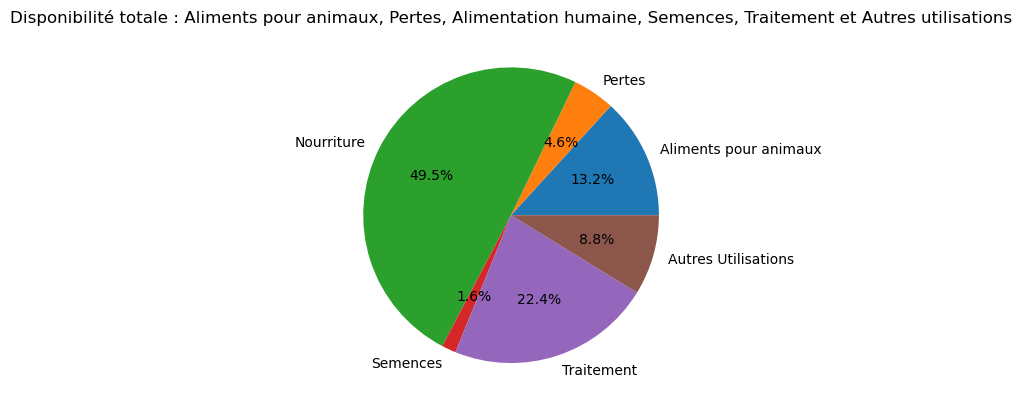

In [66]:
plt.pie(liste4, labels=liste2, autopct='%1.1f%%') 
plt.title("Disponibilité totale : Aliments pour animaux, Pertes, Alimentation humaine, Semences, Traitement et Autres utilisations", fontsize=12)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [67]:
#Création d'une liste avec toutes les variables
liste_variables_produit = ['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Tomates', "Viande d'Ovins/Caprins", 'Viande de Bovins',
       'Viande de Volailles', 'Viande, Autre', 'Vin', 'Épices, Autres',
       'Alcool, non Comestible', 'Animaux Aquatiques Autre',
       'Arachides Decortiquees', 'Avoine', 'Bananes plantains',
       'Boissons Fermentés', 'Cephalopodes', 'Citrons & Limes',
       'Crustacés', 'Girofles', 'Graines Colza/Moutarde', 'Haricots',
       'Huile de Coco', 'Huile de Germe de Maïs', 'Huile de Palmistes',
       'Huiles de Foie de Poisso', 'Huiles de Poissons', 'Ignames',
       'Manioc', 'Mollusques, Autres', 'Oignons', 'Palmistes',
       'Pamplemousse', 'Patates douces', 'Perciform', 'Piments',
       'Plantes Aquatiques', 'Pois', 'Poissons Marins, Autres',
       'Poissons Pelagiques', 'Racines nda', 'Seigle', 'Soja', 'Sorgho',
       'Viande de Suides', 'Huile de Son de Riz', 'Sucre non centrifugé',
       'Viande de Anim Aquatiq']

In [68]:
liste_cereales = ['Blé', 'Avoine', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Seigle', 'Sorgho', 'Soja']

In [69]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
dispo_alimentaire_cereales = dispo_alimentaire1.loc[dispo_alimentaire1['Produit'].isin(liste_cereales),:]
dispo_alimentaire_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0


In [70]:
#Affichage de la proportion d'alimentation animale
dispo_alimentaire_animales = dispo_alimentaire_cereales['Aliments pour animaux'].sum()*100/dispo_alimentaire_cereales['Disponibilité intérieure'].sum()
print("La proportion d'alimentation animale sur la disponibilité totale est de :", round(dispo_alimentaire_animales), "%")

La proportion d'alimentation animale sur la disponibilité totale est de : 33 %


In [71]:
#Affichage de la proportion d'alimentation humaine
dispo_alimentaire_nourriture = dispo_alimentaire_cereales['Nourriture'].sum()*100/dispo_alimentaire_cereales['Disponibilité intérieure'].sum()
print("La proportion d'alimentation humaine sur la disponibilité totale est de :", round(dispo_alimentaire_nourriture), '%')

La proportion d'alimentation humaine sur la disponibilité totale est de : 39 %


In [72]:
dispo_alimentaire_group_cereales = dispo_alimentaire_cereales.groupby('Produit').sum().reset_index()
dispo_alimentaire_group_cereales.head(15)

,Produit,Zone,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Avoine,Afrique du SudAlbanieAlgérieAllemagneAngolaAnt...,vegetalevegetalevegetalevegetalevegetalevegeta...,1.625100e+10,2.060000e+08,880.0,151.43,15.29,35.70,2.340700e+10,3.531000e+09,3.708000e+09,3.903000e+09,5.140000e+08,2.381600e+10,2.485000e+09,3.600000e+07,-577.0
1,Blé,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,vegetalevegetalevegetalevegetalevegetalevegeta...,1.296680e+11,2.242400e+10,96132.0,12339.51,548.76,2809.21,6.794980e+11,1.983800e+11,1.853770e+11,4.578240e+11,2.753000e+10,7.084430e+11,3.428300e+10,7.877000e+09,-15948.0
2,"Céréales, Autres",AfghanistanAfrique du SudAlbanieAlgérieAllemag...,vegetalevegetalevegetalevegetalevegetalevegeta...,1.903500e+10,1.388000e+09,1483.0,193.74,5.46,40.52,2.748500e+10,2.540000e+09,2.882000e+09,5.324000e+09,7.850000e+08,2.841200e+10,1.203000e+09,1.600000e+08,-1267.0
3,Maïs,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,vegetalevegetalevegetalevegetalevegetalevegeta...,5.461160e+11,1.893860e+11,30903.0,3690.37,271.50,771.12,9.557990e+11,1.287870e+11,1.226910e+11,1.251840e+11,4.070100e+10,1.017029e+12,6.837000e+09,4.764800e+10,-55136.0
4,Millet,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,vegetalevegetalevegetalevegetalevegetalevegeta...,3.306000e+09,1.960000e+08,3966.0,513.09,37.27,96.11,2.991100e+10,2.760000e+08,3.430000e+08,2.304000e+10,2.276000e+09,2.890900e+10,6.820000e+08,4.030000e+08,933.0
5,Orge,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,vegetalevegetalevegetalevegetalevegetalevegeta...,9.265800e+10,6.540000e+08,1814.0,263.60,7.35,52.28,1.404390e+11,4.158500e+10,3.868900e+10,6.794000e+09,4.628000e+09,1.424620e+11,8.804000e+09,2.691000e+10,876.0
6,Riz (Eq Blanchi),AfghanistanAfrique du SudAlbanieAlgérieAllemag...,vegetalevegetalevegetalevegetalevegetalevegeta...,3.359400e+10,1.846400e+10,53024.0,5384.46,123.95,1027.25,4.756560e+11,4.144500e+10,3.761800e+10,3.772860e+11,2.737800e+10,4.954470e+11,1.219400e+10,6.740000e+09,-15958.0
7,Seigle,Afrique du SudAlbanieAlgérieAllemagneAntigua-e...,vegetalevegetalevegetalevegetalevegetalevegeta...,8.099000e+09,2.000000e+07,1967.0,263.36,8.62,51.56,1.656700e+10,2.372000e+09,2.251000e+09,5.502000e+09,5.620000e+08,1.671100e+10,1.262000e+09,1.120000e+09,-25.0
8,Soja,Afrique du SudAlbanieAlgérieAllemagneAngolaAnt...,vegetalevegetalevegetalevegetalevegetalevegeta...,1.747600e+10,6.380000e+08,1086.0,127.12,47.72,109.71,2.674450e+11,1.069120e+11,1.020820e+11,1.064800e+10,3.970000e+09,2.783610e+11,7.401000e+09,2.273140e+11,-6082.0
9,Sorgho,Afrique du SudAlbanieAlgérieAllemagneAngolaAnt...,vegetalevegetalevegetalevegetalevegetalevegeta...,2.480800e+10,2.049000e+09,4952.0,614.02,48.34,146.16,5.823700e+10,6.388000e+09,6.418000e+09,2.415300e+10,2.746000e+09,6.211600e+10,7.880000e+08,3.695000e+09,-3913.0


In [73]:
animaux_nourriture = dispo_alimentaire_group_cereales[['Produit', 'Aliments pour animaux', 'Nourriture']]
animaux_nourriture.head(10)

,Produit,Aliments pour animaux,Nourriture
0,Avoine,1.625100e+10,3.903000e+09
1,Blé,1.296680e+11,4.578240e+11
2,"Céréales, Autres",1.903500e+10,5.324000e+09
3,Maïs,5.461160e+11,1.251840e+11
4,Millet,3.306000e+09,2.304000e+10
5,Orge,9.265800e+10,6.794000e+09
6,Riz (Eq Blanchi),3.359400e+10,3.772860e+11
7,Seigle,8.099000e+09,5.502000e+09
8,Soja,1.747600e+10,1.064800e+10
9,Sorgho,2.480800e+10,2.415300e+10


In [74]:
import warnings
warnings.filterwarnings('ignore')
total_cereales = animaux_nourriture['Aliments pour animaux'].sum() + animaux_nourriture['Nourriture'].sum()
animaux_nourriture['Proportion Aliments pour animaux'] = round((animaux_nourriture['Aliments pour animaux']*100)/total_cereales, 2)
animaux_nourriture['Proportion Nourriture'] = round((animaux_nourriture['Nourriture']*100)/total_cereales, 2)
dispo_alimentaire_population['Disponibilité annuelle'] = (dispo_alimentaire_population['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire_population['Population']*365)/1000
animaux_nourriture[['Produit', 'Proportion Aliments pour animaux', 'Proportion Nourriture']].head(10)

,Produit,Proportion Aliments pour animaux,Proportion Nourriture
0,Avoine,0.84,0.20
1,Blé,6.72,23.71
2,"Céréales, Autres",0.99,0.28
3,Maïs,28.29,6.48
4,Millet,0.17,1.19
5,Orge,4.80,0.35
6,Riz (Eq Blanchi),1.74,19.54
7,Seigle,0.42,0.28
8,Soja,0.91,0.55
9,Sorgho,1.28,1.25


In [75]:
animaux_nourriture['Proportion Aliments pour animaux'].sum()

46.16

In [76]:
animaux_nourriture['Proportion Nourriture'].sum()

53.83

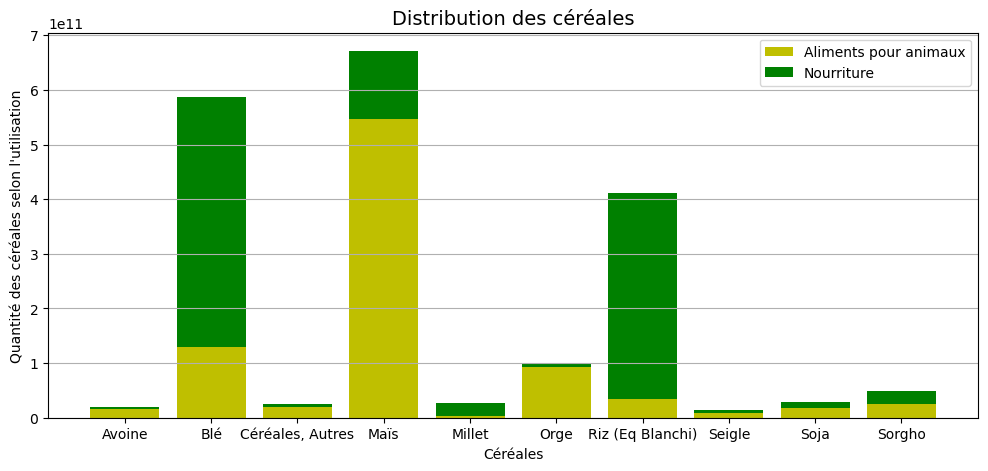

In [77]:
import matplotlib.pyplot as plt

# Données d'exemple
produits = animaux_nourriture['Produit']
aliments_pour_animaux = animaux_nourriture['Aliments pour animaux']
nourriture = animaux_nourriture['Nourriture']

# Créer le graphique à barres empilées
plt.figure(figsize=(12,5))
r = range(len(produits))
barWidth = 0.8
plt.bar(r, aliments_pour_animaux, color='y', width=barWidth, label='Aliments pour animaux')
plt.bar(r, nourriture, bottom=aliments_pour_animaux, color='g', width=barWidth, label='Nourriture')
plt.xticks(r, produits)
plt.ylabel('Quantité des céréales selon l\'utilisation')
plt.grid(axis='y')
plt.xlabel('Céréales')
plt.title('Distribution des céréales', fontsize=14)
plt.legend(loc='upper right')

# Ajouter des étiquettes aux barres
#for i in range(len(produits)):
#    plt.text(i, aliments_pour_animaux[i]/2, aliments_pour_animaux[i], ha='center', va='center')
#    plt.text(i, aliments_pour_animaux[i]+nourriture[i]/2, nourriture[i], ha='center', va='center')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [78]:
#Création de la colonne proportion par pays
proportion_sous_nutrition['Proportion sous nutrition'] = round((proportion_sous_nutrition['sous_nutrition']*100)/proportion_sous_nutrition['Population'],2)
proportion_sous_nutrition.head()

,Zone,Année,Population,sous_nutrition,Proportion sous nutrition
0,Afghanistan,2017,36296113.0,10500000.0,28.93
1,Afrique du Sud,2017,57009756.0,3100000.0,5.44
2,Albanie,2017,2884169.0,100000.0,3.47
3,Algérie,2017,41389189.0,1300000.0,3.14
4,Allemagne,2017,82658409.0,0.0,0.00


In [79]:
#affichage après trie des 10 pires pays
les_dix_pays_proportion_sous_nutrition = proportion_sous_nutrition.sort_values(by = 'Proportion sous nutrition', ascending = False).head(10).reset_index()
les_dix_pays_proportion_sous_nutrition.head(10)

,index,Zone,Année,Population,sous_nutrition,Proportion sous nutrition
0,78,Haïti,2017,10982366.0,5300000.0,48.26
1,157,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.19
2,108,Madagascar,2017,25570512.0,10500000.0,41.06
3,103,Libéria,2017,4702226.0,1800000.0,38.28
4,100,Lesotho,2017,2091534.0,800000.0,38.25
5,183,Tchad,2017,15016753.0,5700000.0,37.96
6,161,Rwanda,2017,11980961.0,4200000.0,35.06
7,121,Mozambique,2017,28649018.0,9400000.0,32.81
8,186,Timor-Leste,2017,1243258.0,400000.0,32.17
9,0,Afghanistan,2017,36296113.0,10500000.0,28.93


In [110]:
les_dix_pays_proportion_sous_nutrition.loc[1, 'Zone'] = 'RPD Corée'
les_dix_pays_proportion_sous_nutrition.head(10)

,index,Zone,Année,Population,sous_nutrition,Proportion sous nutrition
0,78,Haïti,2017,10982366.0,5300000.0,48.26
1,157,RPD Corée,2017,25429825.0,12000000.0,47.19
2,108,Madagascar,2017,25570512.0,10500000.0,41.06
3,103,Libéria,2017,4702226.0,1800000.0,38.28
4,100,Lesotho,2017,2091534.0,800000.0,38.25
5,183,Tchad,2017,15016753.0,5700000.0,37.96
6,161,Rwanda,2017,11980961.0,4200000.0,35.06
7,121,Mozambique,2017,28649018.0,9400000.0,32.81
8,186,Timor-Leste,2017,1243258.0,400000.0,32.17
9,0,Afghanistan,2017,36296113.0,10500000.0,28.93


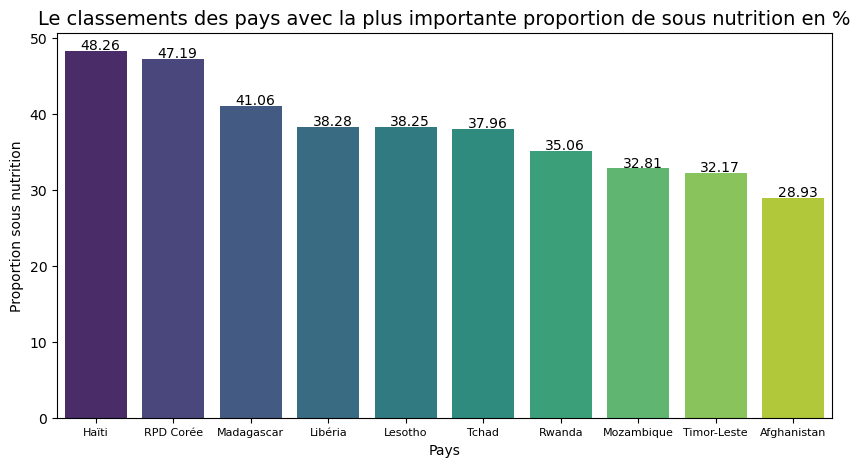

In [141]:
plt.figure(figsize=(10,5))
sns.barplot(data=les_dix_pays_proportion_sous_nutrition, x='Zone', y='Proportion sous nutrition', palette="viridis")
plt.xlabel("Pays")
plt.xticks(fontsize=8)
plt.title("Le classements des pays avec la plus importante proportion de sous nutrition en %", fontsize=14)
va = les_dix_pays_proportion_sous_nutrition['Proportion sous nutrition'].tolist()
for i in range(10):
    plt.text(i-0.2, va[i]+0.20, va[i])
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [82]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire_group = aide_alimentaire.groupby('Zone').sum().reset_index()
aide_alimentaire_group[['Zone', 'Valeur']].head()

,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000


In [83]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
dix_pays_aide_alimentaire = aide_alimentaire_group[['Zone', 'Valeur']].sort_values(by = 'Valeur', ascending = False).reset_index().head(10)
dix_pays_graphique = dix_pays_aide_alimentaire[['Zone', 'Valeur']]
dix_pays_graphique.head(10)

,Zone,Valeur
0,République arabe syrienne,1858943000
1,Éthiopie,1381294000
2,Yémen,1206484000
3,Soudan du Sud,695248000
4,Soudan,669784000
5,Kenya,552836000
6,Bangladesh,348188000
7,Somalie,292678000
8,République démocratique du Congo,288502000
9,Niger,276344000


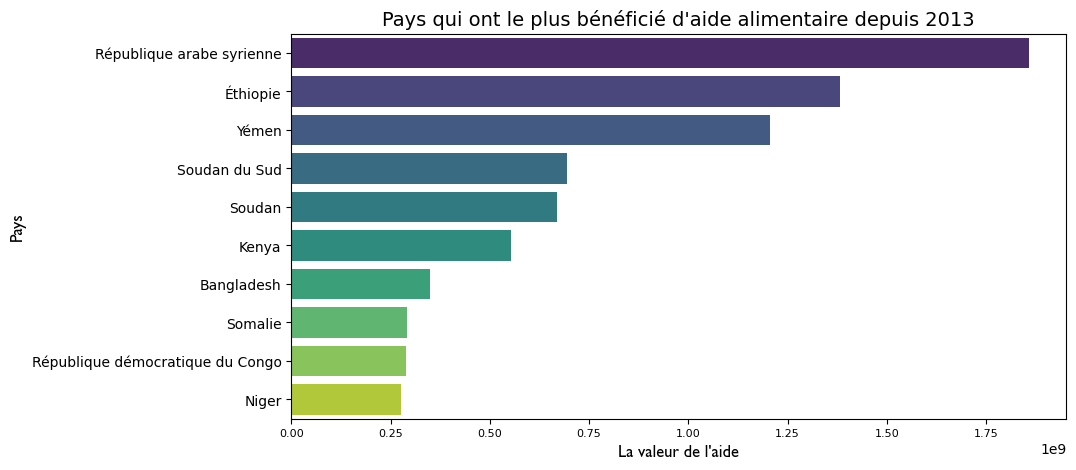

In [84]:
plt.figure(figsize=(10,5))
sns.barplot(data=dix_pays_graphique, x='Valeur', y='Zone', palette="viridis")
plt.xlabel("La valeur de l'aide",fontname='Gill Sans MT', fontsize=12)
plt.ylabel("Pays", fontname='Gill Sans MT', fontsize=12)
plt.xticks(fontsize=8)
plt.title("Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013", fontsize=14)
plt.show()

In [85]:
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [86]:
aide_alimentaire_group_année = aide_alimentaire.groupby('Année').sum().reset_index()
aide_alimentaire_group_année.head()

,Année,Zone,Produit,Valeur
0,2013,AfghanistanAfghanistanAfghanistanAfghanistanAf...,Autres non-céréalesBlé et FarinCéréalesFruits ...,4165674000
1,2014,AfghanistanAfghanistanAfghanistanAfghanistanAf...,Autres non-céréalesBlé et FarinCéréalesHuiles ...,3939152000
2,2015,AlgérieAlgérieAlgérieAlgérieAlgérieAlgérieAlgé...,Autres non-céréalesCéréalesCéréales Secondaire...,2187507000
3,2016,AlgérieAlgérieAlgérieAlgérieAlgérieAlgérieAlgé...,"CéréalesCéréales SecondairesFruits secs, total...",743568000


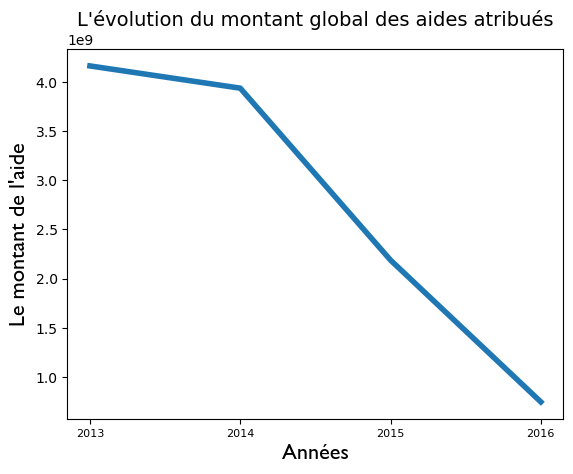

In [144]:
plt.plot(aide_alimentaire_group_année['Année'], aide_alimentaire_group_année['Valeur'], linewidth=4)
plt.xlabel("Années", fontname='Gill Sans MT', fontsize=16)
plt.ylabel("Le montant de l'aide", fontname='Gill Sans MT', fontsize=16)
plt.xticks(aide_alimentaire_group_année['Année'].astype(int), fontsize=8)
plt.title("L'évolution du montant global des aides atribués", fontsize=14)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [88]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimentaire_ZAV = aide_alimentaire[['Zone', 'Année', 'Valeur']].copy()
aide_alimentaire_ZAV.head()

,Zone,Année,Valeur
0,Afghanistan,2013,682000
1,Afghanistan,2014,335000
2,Afghanistan,2013,39224000
3,Afghanistan,2014,15160000
4,Afghanistan,2013,40504000


In [89]:
aide_alimentaire_group = aide_alimentaire_ZAV.groupby(['Zone', 'Année']).sum().reset_index()
aide_alimentaire_group.head()

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000


In [90]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [91]:
#On filtre sur le dataframe avec notre liste
aide_alim_graph = aide_alimentaire_group.loc[aide_alimentaire_group['Zone'].isin(liste),:]

In [92]:
# Affichage des pays avec l'aide alimentaire par année
aide_alim_graph.head(20)

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


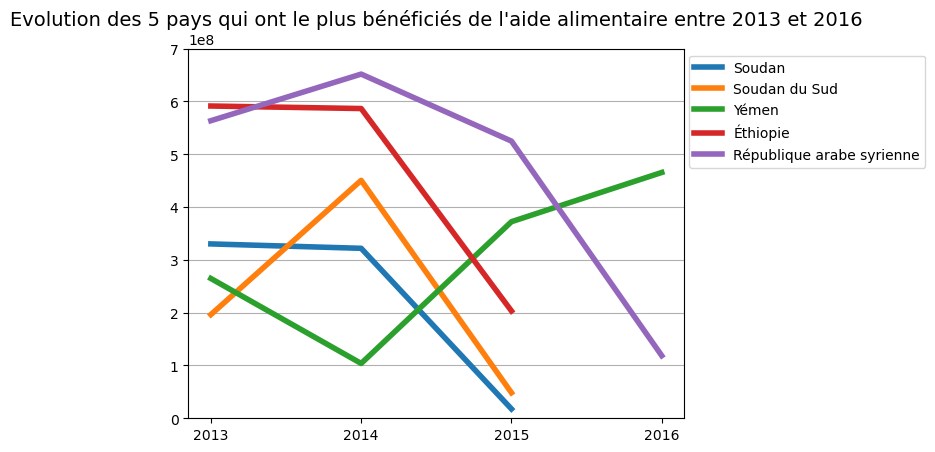

In [93]:
Soudan = aide_alim_graph.loc[aide_alim_graph['Zone'] == 'Soudan', :]
SoudanSud = aide_alim_graph.loc[aide_alim_graph['Zone'] == 'Soudan du Sud', :]
Yemen = aide_alim_graph.loc[aide_alim_graph['Zone'] == 'Yémen', :]
Etiophie = aide_alim_graph.loc[aide_alim_graph['Zone'] == 'Éthiopie', :]
Syrie = aide_alim_graph.loc[aide_alim_graph['Zone'] == 'République arabe syrienne', :]
plt.plot(Soudan['Année'], Soudan['Valeur'], label ='Soudan', linewidth=4)
plt.plot(SoudanSud['Année'], SoudanSud['Valeur'], label ='Soudan du Sud', linewidth=4)
plt.plot(Yemen['Année'], Yemen['Valeur'], label ='Yémen', linewidth=4)
plt.plot(Etiophie['Année'], Etiophie['Valeur'], label ='Éthiopie', linewidth=4)
plt.plot(Syrie['Année'], Syrie['Valeur'], label ='République arabe syrienne', linewidth=4)
plt.title("Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016", fontsize=14)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.grid(axis='y')
plt.ylim(0, 700000000)
plt.xticks([2013, 2014, 2015, 2016])
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [94]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_alimentaire_population.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,Disponibilité annuelle
0,Afghanistan,"Abats ComestibleAgrumes, AutresAliments pour e...",animalevegetalevegetalevegetalevegetaleanimale...,7.680000e+08,4.150000e+08,2087.0,351.41,33.50,58.26,1.351500e+10,2.780000e+08,2.988000e+09,1.073500e+10,1.135000e+09,1.117100e+10,3.950000e+08,6.300000e+07,-368.0,36296113.0,2.764875e+10
1,Afrique du Sud,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,5.309000e+09,8.760000e+08,3020.0,564.80,83.58,85.33,6.125600e+10,1.167400e+10,7.517000e+09,2.981200e+10,2.193000e+09,6.326300e+10,2.530000e+08,2.281900e+10,2153.0,57009756.0,6.284185e+10
2,Albanie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,6.600000e+08,1.740000e+08,3188.0,1095.54,106.48,111.37,4.758000e+09,9.400000e+07,9.330000e+08,3.476000e+09,2.760000e+08,3.964000e+09,5.500000e+07,1.130000e+08,-45.0,2884169.0,3.356077e+09
3,Algérie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,4.352000e+09,1.707000e+09,3293.0,809.13,76.48,91.92,4.263000e+10,6.550000e+08,1.740300e+10,3.172900e+10,3.753000e+09,2.635900e+10,4.490000e+08,6.370000e+08,-479.0,41389189.0,4.974753e+10
4,Allemagne,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,3.020900e+10,7.711000e+09,3503.0,957.52,141.62,101.39,1.622750e+11,5.743100e+10,6.535300e+10,7.923800e+10,3.781000e+09,1.545470e+11,1.551000e+09,3.984200e+10,-192.0,82658409.0,1.056866e+11


In [95]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
liste_pays_moins_dispo_alim = dispo_alimentaire_population.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)').head(10)

In [96]:
liste_pays_moins_dispo_alim[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [97]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
liste_pays_plus_dispo_alim = dispo_alimentaire_population.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = False).head(10)

In [98]:
liste_pays_plus_dispo_alim[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [99]:
#création d'un dataframe avec uniquement la Thaïlande 
dispo_alimentaire_group_Thailande = dispo_alimentaire1.loc[dispo_alimentaire1['Zone'] == 'Thaïlande', :]
dispo_alimentaire_group_Thailande.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000000.0,5.000000e+06,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000000.0,6.000000e+06,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358000000.0,0.0,0.00,0.00,0.00,358000000.0,1.100000e+08,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12000000.0,7.000000e+06,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782000000.0,1.449000e+09,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13.0


In [100]:
dispo_alimentaire_Thailande = dispo_alimentaire_group_Thailande.groupby(["Zone"]).sum()
dispo_alimentaire_Thailande.head()

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Thaïlande,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,9.561000e+09,4.210000e+09,2785.0,586.23,58.57,60.85,1.581300e+11,5.043000e+10,1.133500e+10,3.928300e+10,5.749000e+09,2.017640e+11,823000000.0,9.917000e+10,-4534.0


In [101]:
dispo_alimentaire_group_Thailande_manioc = dispo_alimentaire_group_Thailande.loc[dispo_alimentaire_group_Thailande['Produit'] == 'Manioc', :]
dispo_alimentaire_group_Thailande_manioc.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [102]:
#Calcul de la sous nutrition en Thaïlande
proportion_sous_nutrition_Thailande = proportion_sous_nutrition.loc[proportion_sous_nutrition['Zone'] == 'Thaïlande', :]
proportion_sous_nutrition_Thailande.head()

,Zone,Année,Population,sous_nutrition,Proportion sous nutrition
185,Thaïlande,2017,69209810.0,6200000.0,8.96


In [103]:
# On calcule la proportion exportée en fonction de la proportion
manioc_proportion_export=round(dispo_alimentaire_group_Thailande_manioc['Exportations - Quantité']*100/dispo_alimentaire_group_Thailande_manioc['Production']).item()
print("Le proportion exporté est de {} % de la production de Manioc. ".format(round(manioc_proportion_export)))

Le proportion exporté est de 83 % de la production de Manioc. 


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Etape 6 - Analyse Complémentaires République Centraficaine</h3>
</div>

In [104]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

In [105]:
#afficher la sou-nutrition en Républiqe centrafricaine
proportion_sous_nutrition.loc[proportion_sous_nutrition['Zone'] == 'République centrafricaine', :].head()

,Zone,Année,Population,sous_nutrition,Proportion sous nutrition
151,République centrafricaine,2017,4596023.0,0.0,0.0


In [106]:
#afficher la Disponibilité alimentaire en Républiqe centrafricaine
dispo_alimentaire_group.loc[dispo_alimentaire_group['Zone'] == 'République centrafricaine', :]

,Zone,Origine,Produit,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
256,République centrafricaine,animale,"Abats ComestibleBeurre, GheeCephalopodesCrusta...",0.0,1000000.0,206.0,55.41,13.94,17.12,2.610000e+08,0.0,12000000.0,2.550000e+08,3000000.0,2.490000e+08,1000000.0,0.0,0.0
257,République centrafricaine,vegetale,"Alcool, non ComestibleAliments pour enfantsAna...",1000000.0,26000000.0,1673.0,398.32,45.47,28.92,2.321000e+09,0.0,64000000.0,1.837000e+09,119000000.0,2.254000e+09,62000000.0,278000000.0,3.0


In [107]:
# afficher l'aide et  la disponibilité alimentaire 
liste_pays_moins_dispo_alim[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité']].head(1)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
128,République centrafricaine,1879.0,2.582000e+09,0.0,76000000.0


In [108]:
#aide alimentaire par année
aide_alimentaire_group = aide_alimentaire.groupby(['Zone', 'Année']).sum().reset_index()
aide_alimentaire_group.head()
aide_alimentaire_centrafrique = aide_alimentaire_group.loc[aide_alimentaire_group['Zone'] == 'République centrafricaine', :]
aide_alimentaire_centrafrique.head()

,Zone,Année,Produit,Valeur
161,République centrafricaine,2013,Autres non-céréalesCéréalesCéréales Secondaire...,17156000
162,République centrafricaine,2014,Autres non-céréalesCéréalesCéréales Secondaire...,27418000
163,République centrafricaine,2015,Autres non-céréalesCéréalesCéréales Secondaire...,22036000


In [109]:
#aide alimentaire total
aide_alimentaire_centrafricaine = aide_alimentaire_centrafrique['Valeur'].sum()
print("L'aide alimentaire total reçu par la République centrafricaine entre 2013 et 2015 est de ", aide_alimentaire_centrafricaine, "€")

L'aide alimentaire total reçu par la République centrafricaine entre 2013 et 2015 est de  66610000 €
